In [328]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

telco = pd.read_csv("telco.csv")

telco.head()


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


### Step 1: Define your goal. What's the impact? Who benefits? Why does this matter?
    
Goal: identify key drivers for customer churn

Impact: Churn costs money; losing customers reduces revenue and acquiring new customers costs more than retaining customers.

Industry standard: Telecommunications companies average about 2.5 percent monthly in churned customers. New customers cost, on average $315 to acquire.

Who benefits: The company will be able to increase overall profits by reducing churn, which can also benefit the customer by allowing additional promotions

https://stlpartners.com/research/telco-economics-mobile-churn-rates-and-reduction-strategies/

Target variable: churn

Important variables:
dependents
partner
is_senior_citizen
payment_type
contract_type
tenure
monthly_charges


MVP:
    first glance look at:
    costs of churn
    drivers of churn
    incentives to reduce churn

Deliverable:
3 minute presentation on MVP

    

<AxesSubplot:>

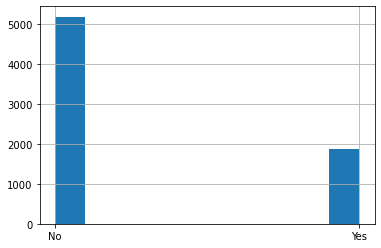

In [49]:
telco.churn.hist()

In [47]:
telco.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

In [50]:
telco[telco.churn == "Yes"].shape[0] / telco.shape[0] * 100
# the percentage of customers that churn is well above the monthly standard of 2.5%

26.528585614980848

In [64]:
# determine monthly lost profits for customers that churn
monthly_cost = telco[telco.churn == 'Yes'].monthly_charges.sum()
print("The monthly cost of customers that churn is: ", '$', round(monthly_cost))

The monthly cost of customers that churn is:  $ 139161


In [63]:
# determine annual lost profits for customers that churn
annual_cost = telco[telco.churn == 'Yes'].monthly_charges.sum() * 12
print("The annual cost of customers that churn is: ", '$', round(annual_cost))

The annual cost of customers that churn is:  $ 1669936


In [77]:
# determine cost of replacing churned customers (acquisition cost is $315 per new customer)

monthly_acquisition_cost = len(telco[telco.churn == 'Yes']) * 315
print("The monthly cost of acquiring new customers to replace those that churn is: ", '$', round(monthly_acquisition_cost))


The monthly cost of acquiring new customers to replace those that churn is:  $ 589050


In [346]:
annual_acquisition_cost = len(telco[telco.churn == 'Yes']) * 315 * 12
print("The annual cost of acquiring new customers to replace those that churn is: ", '$', round(annual_acquisition_cost))

The annual cost of acquiring new customers to replace those that churn is:  $ 7068600


In [82]:
# on a monthly basis, what would churning customers and acquiring their replacements cost?
print('$', (round(monthly_cost + monthly_acquisition_cost)))

$ 728211


In [ ]:
#cost of incentives


### Step 2: Get to know your data at a high level


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


In [356]:
# data cleanup
# total_charges seems to have some null values
telco['is_senior_citizen'] = telco['is_senior_citizen'].replace([0, 1],['No', 'Yes']).astype('object')
# changing senior citizen to be more like partner and dependents columns

telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,autopay
0,0002-ORFBO,Female,No,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0,No
1,0003-MKNFE,Male,No,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1,No
2,0004-TLHLJ,Male,No,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8,No
3,0011-IGKFF,Male,Yes,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6,No
4,0013-EXCHZ,Female,Yes,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2,No


In [40]:
# changing values of contract type to the actual contract verus 0,1,2
telco.contract_type == 1
telco.loc[telco["contract_type"] == 1, "contract_type"] = '1 year'
telco.loc[telco["contract_type"] == 2, "contract_type"] = '2 year'
telco.loc[telco["contract_type"] == 0, "contract_type"] = 'month-to-month'
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,No,Yes,Yes,1,1,1 year,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,2,1,month-to-month,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,No,No,No,1,2,month-to-month,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,Yes,Yes,No,1,2,month-to-month,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,Yes,Yes,No,1,2,month-to-month,Mailed check,83.9,267.40,Yes,3.2


In [46]:
# round tenure values to whole numbers
telco['tenure'] = round(telco.tenure)
telco

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,No,Yes,Yes,1,1,1 year,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,2,1,month-to-month,Mailed check,59.90,542.40,No,9.0
2,0004-TLHLJ,Male,No,No,No,1,2,month-to-month,Electronic check,73.90,280.85,Yes,4.0
3,0011-IGKFF,Male,Yes,Yes,No,1,2,month-to-month,Electronic check,98.00,1237.85,Yes,13.0
4,0013-EXCHZ,Female,Yes,Yes,No,1,2,month-to-month,Mailed check,83.90,267.40,Yes,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,No,1,1,1 year,Mailed check,55.15,742.90,No,14.0
7045,9992-RRAMN,Male,No,Yes,No,2,2,month-to-month,Electronic check,85.10,1873.70,Yes,22.0
7046,9992-UJOEL,Male,No,No,No,1,1,month-to-month,Mailed check,50.30,92.75,No,2.0
7047,9993-LHIEB,Male,No,Yes,Yes,1,1,2 year,Mailed check,67.85,4627.65,No,68.0


In [372]:
# creating autopay column
telco['autopay'] = np.where(telco['payment_type'].str.contains('auto'), 'Yes', 'No')
telco.sample(5)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,autopay
6848,9730-DRTMJ,Male,No,Yes,No,2,1,1,Credit card (automatic),72.80,2333.05,No,32.0,Yes
6890,9786-YWNHU,Female,No,Yes,Yes,1,1,2,Mailed check,63.55,4014.20,No,63.2,No
5224,7353-YOWFP,Female,No,No,No,1,0,1,Mailed check,20.25,129.15,No,6.4,No
2712,3863-IUBJR,Male,No,Yes,Yes,1,1,1,Credit card (automatic),53.65,696.35,Yes,13.0,Yes
720,1062-LHZOD,Male,No,Yes,Yes,1,2,0,Mailed check,69.90,69.90,Yes,1.0,No


In [365]:
telco.monthly_charges.median()

70.35

In [277]:
single = telco[(telco.partner == 'No') & (telco.dependents == 'No')]
single_churned = telco[(telco.partner == 'No') & (telco.dependents == 'No') & (telco.churn == 'Yes')]
len(single_churned) / len(single)

0.3422736970435843

In [364]:
len(single) / len(telco)

0.4654560930628458

In [366]:
single.monthly_charges.median()

69.7

In [309]:
len(has_family) / len(telco)

0.5345439069371543

In [293]:
has_family = telco[(telco.dependents == 'Yes') | (telco.partner == 'Yes')]
has_family_churned = telco[((telco.dependents == 'Yes') | (telco.partner == 'Yes')) & (telco.churn == 'Yes')]
len(has_family_churned) / len(has_family)

0.1982484076433121

In [367]:
has_family.monthly_charges.median()

72.85

In [305]:
senior = telco[(telco.is_senior_citizen == 'Yes')]
senior_churned = telco[(telco.is_senior_citizen == 'Yes') & (telco.churn == 'Yes')]
len(senior_churned) / len(senior)

0.4168126094570928

In [368]:
senior.monthly_charges.median()

84.85

In [396]:
# how many customers don't have autopay
len(telco[telco.autopay == 'No'])

3977

In [376]:
# total monthly income of those without autopay
telco[telco.autopay == 'No'].monthly_charges.sum()

251139.30000000002

In [377]:
# if everyone without autopay enrolled in autopay and was discounted
telco[telco.autopay == 'No'].monthly_charges.sum() - (telco[telco.autopay == 'No'].monthly_charges.sum() * .10)

226025.37000000002

In [378]:
# total monthly income of those with autopay
telco[telco.autopay == 'Yes'].monthly_charges.sum()

205262.4

In [390]:
# of the customers that churned 7% had autopay vs 20% that did not
len(telco[(telco.autopay == 'Yes') & (telco.churn == 'Yes')]) / len(telco)

0.06965527025109945

In [391]:
len(telco[(telco.autopay == 'No') & (telco.churn == 'Yes')]) / len(telco)

0.19563058589870905

In [442]:
# if we converted 25% of non-autopayers to autopay with a 10% discount we would spend $6279 for 25%, if we convert 25% we increase
# retainability and prevent losses of $12,283

len(telco[(telco.autopay == 'No') & (telco.churn == 'Yes')]) / len(telco) * .25 * telco[telco.autopay == 'No'].monthly_charges.sum()


12282.632100297917

180345.0

In [429]:
len(telco[telco['payment_type'].str.contains('Elec') & (telco.churn == 'Yes')])


1071

In [435]:
len(telco[telco['payment_type'].str.contains('Elec') & (telco.churn == 'No')])

1294

### Step 3: Answer your initial hypotheses with visuals and statistics

Initial hypotheses:
    Monthly costs will impact churn rate
    Customer demographics impact churn
    Payment type impacts churn

Takeaways:
Customers that churn have higher monthly charges
Families are more likely to stay
42% of seniors are churning
Customers with electronic payments churn at the highest rate

Proposal:
Market to families as they are more likely to stay.
Offer 15% discounts to seniors 
Incentivize autopay with 10% discount

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

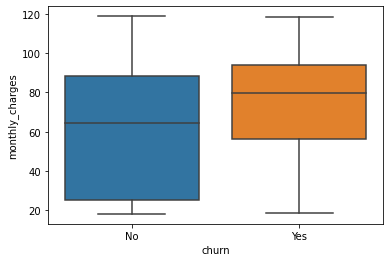

In [229]:
# customers that churn have higher monthly charges based on the median 
sns.boxplot(data = telco, x = 'churn', y = 'monthly_charges')

In [ ]:
# does family type impact costs?churn? (single, partnered, dependents, senior citizen)
# there are slight differences in average monthly costs based off of family type
# biggest area to look into is senior citizens are paying, on average $18 more monthly than non-seniors
# are senior citizens churning more frequently? 42% of seniors churned
# those with partners/dependents are less likely to churn than those without
# those without autopay churn more frequently -- specifically those with electronic payments

#areas to incentivize are autopay and senior discounts






,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,autopay
1355,2017-CCBLH,Female,0,No,No,1,0,2,Mailed check,20.00,141.60,No,7.1,No
4320,6094-ZIVKX,Female,0,No,No,1,1,1,Credit card (automatic),54.45,3674.95,No,67.5,Yes
6718,9541-ZPSEA,Male,0,Yes,Yes,1,2,2,Credit card (automatic),80.35,5375.15,No,66.9,Yes
5440,7660-HDPJV,Female,0,No,No,1,2,0,Electronic check,69.20,69.20,Yes,1.0,No
1373,2038-LLMLM,Female,0,No,No,2,2,0,Electronic check,103.85,4946.05,No,47.6,No


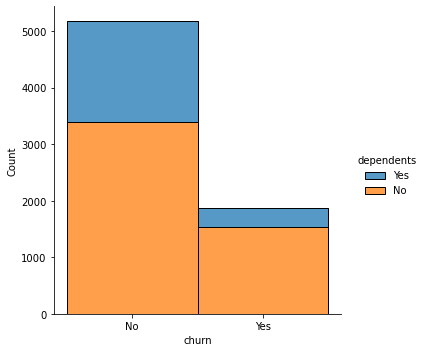

In [362]:
sns.displot(data = telco, x = 'churn', hue = 'dependents', multiple = 'stack')

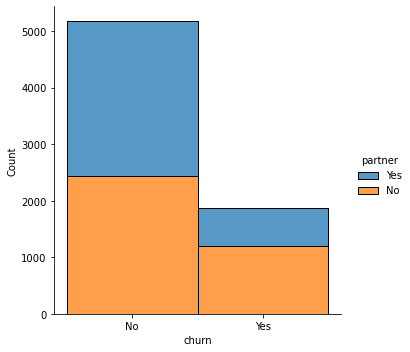

In [361]:
sns.displot(data = telco, x = 'churn', hue = 'partner', multiple = 'stack')

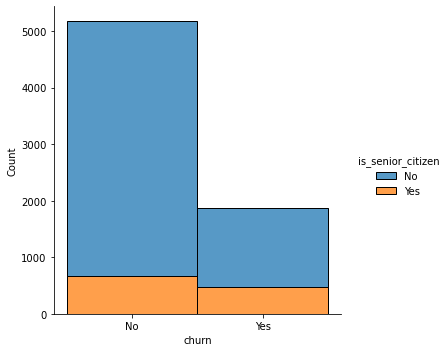

In [357]:
sns.displot(data = telco, x = 'churn', hue = 'is_senior_citizen', multiple = 'stack')

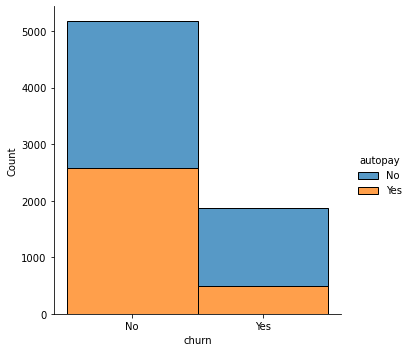

In [350]:
sns.displot(data = telco, x = 'churn', hue = 'autopay', multiple = 'stack')